In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
import numpy as np
import math
import warnings
warnings.filterwarnings("ignore")

In [2]:
n_estimators = [int(x) for x in np.linspace(start = 5,stop = 15,num=11)]
max_depth = [int(x) for x in np.linspace(3,10,num=8)]

## M01AB

In [22]:
cols = ["M01AB","Year","Month","Hour","Weekday Name"]
data = pd.read_csv('pharma/saleshourly.csv',usecols=cols)
enc = LabelEncoder()
data.loc[:,['Weekday Name']] = data.loc[:,['Weekday Name']].apply(enc.fit_transform)
arr_mean = data['M01AB'].rolling(5).mean()
data['MA'] = arr_mean
data.fillna(0,inplace=True)
features = data.drop(['M01AB'],axis=1)
target = data['M01AB']
x_train = features[:-7]
y_train = target[:-7]
x_test = features[-7:]
y_test = target[-7:]
y_test = np.asarray(y_test)

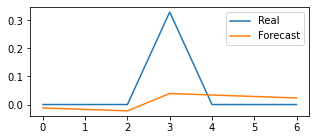

In [23]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
predictions = lr_model.predict(x_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [24]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

0.11215911778468725


In [25]:
dt_model = DecisionTreeRegressor(criterion='mse')
parameters = {
    'max_depth' : max_depth
}
model = GridSearchCV(dt_model, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 8}

In [26]:
dt_model = DecisionTreeRegressor(criterion='mse',max_depth=8)
dt_model.fit(x_train,y_train)
predictions = dt_model.predict(x_test)
y_test = np.asarray(y_test)

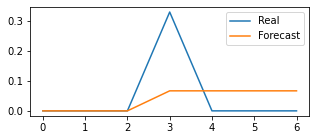

In [27]:
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [28]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

0.10866390994641993


In [29]:
rf = RandomForestRegressor(random_state = 1)
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth
    
}

model = GridSearchCV(rf, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 8, 'n_estimators': 10}

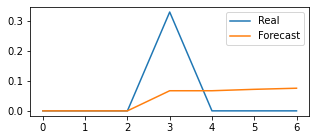

In [30]:
rf = RandomForestRegressor(random_state = 1,max_depth = 8,n_estimators = 10)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [31]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

0.10985069239528433


In [32]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror')
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'colsample_bytree': [0.3,0.5, 0.7],
    'learning_rate' : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ]
    
}
model = GridSearchCV(xg, param_grid=parameters,cv=10)
model.fit(x_train,y_train)
model.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.3,
 'max_depth': 6,
 'n_estimators': 15}

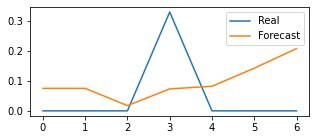

In [33]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror',n_estimators = 15,max_depth = 6,colsample_bytree= 0.7,learning_rate=0.3)
xg.fit(x_train,y_train)
predictions = xg.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [34]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

0.14526737825704078


## M01AE

In [8]:
cols = ["M01AE","Year","Month","Hour","Weekday Name"]
data = pd.read_csv('pharma/saleshourly.csv',usecols=cols)
enc = LabelEncoder()
data.loc[:,['Weekday Name']] = data.loc[:,['Weekday Name']].apply(enc.fit_transform)
arr_mean = data['M01AE'].rolling(5).mean()
data['MA'] = arr_mean
data.fillna(0,inplace=True)
features = data.drop(['M01AE'],axis=1)
target = data['M01AE']
x_train = features[:-7]
y_train = target[:-7]
x_test = features[-7:]
y_test = target[-7:]
y_test = np.asarray(y_test)

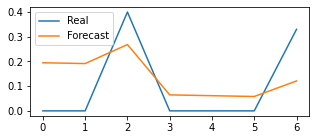

In [9]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
predictions = lr_model.predict(x_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [10]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

0.1448436028472583


In [11]:
dt_model = DecisionTreeRegressor(criterion='mse')
parameters = {
    'max_depth' : max_depth
}
model = GridSearchCV(dt_model, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 9}

In [12]:
dt_model = DecisionTreeRegressor(criterion='mse',max_depth=9)
dt_model.fit(x_train,y_train)
predictions = dt_model.predict(x_test)
y_test = np.asarray(y_test)

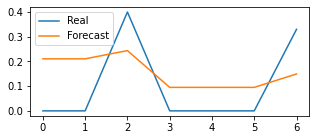

In [13]:
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [14]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

0.15710412430320214


In [15]:
rf = RandomForestRegressor(random_state = 1)
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth
    
}

model = GridSearchCV(rf, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 10, 'n_estimators': 15}

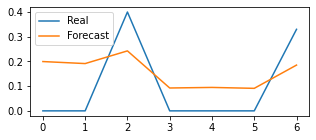

In [16]:
rf = RandomForestRegressor(random_state = 1,max_depth = 10,n_estimators = 15)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [17]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

0.14540634865217658


In [18]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror')
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'colsample_bytree': [0.3,0.5, 0.7],
    'learning_rate' : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ]
    
}
model = GridSearchCV(xg, param_grid=parameters,cv=10)
model.fit(x_train,y_train)
model.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.3,
 'max_depth': 6,
 'n_estimators': 15}

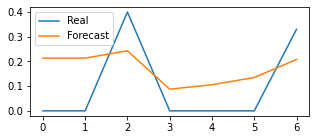

In [19]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror',n_estimators = 15,max_depth = 6,colsample_bytree= 0.7,learning_rate=0.3)
xg.fit(x_train,y_train)
predictions = xg.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [20]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

0.1548093827466985


## N02BA

In [3]:
cols = ["N02BA","Year","Month","Hour","Weekday Name"]
data = pd.read_csv('pharma/saleshourly.csv',usecols=cols)
enc = LabelEncoder()
data.loc[:,['Weekday Name']] = data.loc[:,['Weekday Name']].apply(enc.fit_transform)
arr_mean = data['N02BA'].rolling(5).mean()
data['MA'] = arr_mean
data.fillna(0,inplace=True)
features = data.drop(['N02BA'],axis=1)
target = data['N02BA']
x_train = features[:-7]
y_train = target[:-7]
x_test = features[-7:]
y_test = target[-7:]
y_test = np.asarray(y_test)

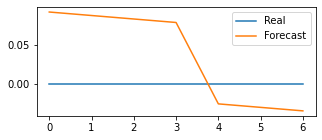

In [4]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
predictions = lr_model.predict(x_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [5]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

0.06796021590799717


In [6]:
dt_model = DecisionTreeRegressor(criterion='mse')
parameters = {
    'max_depth' : max_depth
}
model = GridSearchCV(dt_model, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 8}

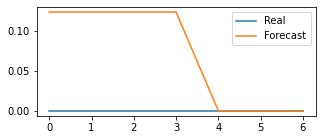

In [8]:
dt_model = DecisionTreeRegressor(criterion='mse',max_depth=8)
dt_model.fit(x_train,y_train)
predictions = dt_model.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [9]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

0.09331472280570365


In [10]:
rf = RandomForestRegressor(random_state = 1)
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth
    
}

model = GridSearchCV(rf, param_grid=parameters, scoring='neg_mean_absolute_error', cv=3)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 7, 'n_estimators': 12}

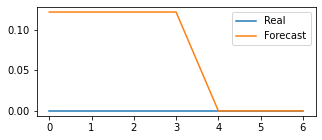

In [11]:
rf = RandomForestRegressor(random_state = 1,max_depth = 7,n_estimators = 12)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [12]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

0.09211567226035403


In [13]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror')
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'colsample_bytree': [0.3,0.5, 0.7],
    'learning_rate' : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ]
    
}
model = GridSearchCV(xg, param_grid=parameters,cv=3)
model.fit(x_train,y_train)
model.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.3,
 'max_depth': 6,
 'n_estimators': 15}

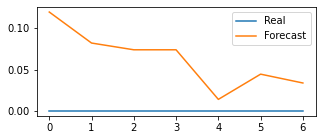

In [14]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror',n_estimators = 15,max_depth = 6,colsample_bytree= 0.7,learning_rate=0.3)
xg.fit(x_train,y_train)
predictions = xg.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [15]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

0.07107574958017607


## N02BE

In [16]:
cols = ["N02BE","Year","Month","Hour","Weekday Name"]
data = pd.read_csv('pharma/saleshourly.csv',usecols=cols)
enc = LabelEncoder()
data.loc[:,['Weekday Name']] = data.loc[:,['Weekday Name']].apply(enc.fit_transform)
arr_mean = data['N02BE'].rolling(5).mean()
data['MA'] = arr_mean
data.fillna(0,inplace=True)
features = data.drop(['N02BE'],axis=1)
target = data['N02BE']
x_train = features[:-7]
y_train = target[:-7]
x_test = features[-7:]
y_test = target[-7:]
y_test = np.asarray(y_test)

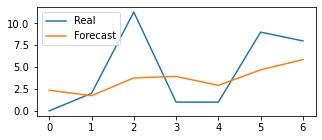

In [17]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
predictions = lr_model.predict(x_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [18]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

3.7394011751512704


In [19]:
dt_model = DecisionTreeRegressor(criterion='mse')
parameters = {
    'max_depth' : max_depth
}
model = GridSearchCV(dt_model, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 9}

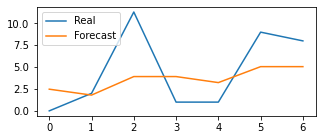

In [20]:
dt_model = DecisionTreeRegressor(criterion='mse',max_depth=9)
dt_model.fit(x_train,y_train)
predictions = dt_model.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [21]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

3.7489470903745934


In [22]:
rf = RandomForestRegressor(random_state = 1)
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth
    
}

model = GridSearchCV(rf, param_grid=parameters, scoring='neg_mean_absolute_error', cv=3)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 10, 'n_estimators': 14}

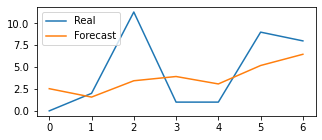

In [23]:
rf = RandomForestRegressor(random_state = 1,max_depth = 10,n_estimators = 14)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [24]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

3.744529413925815


In [25]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror')
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'colsample_bytree': [0.3,0.5, 0.7],
    'learning_rate' : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ]
    
}
model = GridSearchCV(xg, param_grid=parameters,cv=3)
model.fit(x_train,y_train)
model.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.3,
 'max_depth': 6,
 'n_estimators': 15}

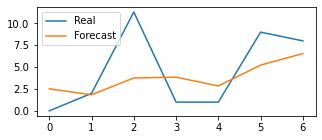

In [26]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror',n_estimators = 15,max_depth = 6,colsample_bytree= 0.7,learning_rate=0.3)
xg.fit(x_train,y_train)
predictions = xg.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [27]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

3.6061681664751473


## N05B

In [28]:
cols = ["N05B","Year","Month","Hour","Weekday Name"]
data = pd.read_csv('pharma/saleshourly.csv',usecols=cols)
enc = LabelEncoder()
data.loc[:,['Weekday Name']] = data.loc[:,['Weekday Name']].apply(enc.fit_transform)
arr_mean = data['N05B'].rolling(5).mean()
data['MA'] = arr_mean
data.fillna(0,inplace=True)
features = data.drop(['N05B'],axis=1)
target = data['N05B']
x_train = features[:-7]
y_train = target[:-7]
x_test = features[-7:]
y_test = target[-7:]
y_test = np.asarray(y_test)

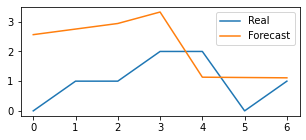

In [29]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
predictions = lr_model.predict(x_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [30]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

1.5681430829042111


In [31]:
dt_model = DecisionTreeRegressor(criterion='mse')
parameters = {
    'max_depth' : max_depth
}
model = GridSearchCV(dt_model, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 8}

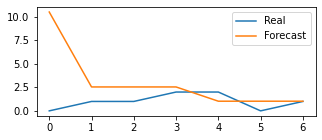

In [32]:
dt_model = DecisionTreeRegressor(criterion='mse',max_depth=8)
dt_model.fit(x_train,y_train)
predictions = dt_model.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [33]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

4.093336595310065


In [34]:
rf = RandomForestRegressor(random_state = 1)
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth
    
}

model = GridSearchCV(rf, param_grid=parameters, scoring='neg_mean_absolute_error', cv=3)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 7, 'n_estimators': 15}

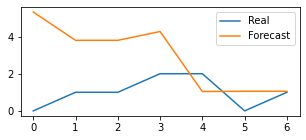

In [35]:
rf = RandomForestRegressor(random_state = 1,max_depth = 7,n_estimators = 15)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [36]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

2.7050718569818235


In [37]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror')
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'colsample_bytree': [0.3,0.5, 0.7],
    'learning_rate' : [0.05, 0.10, 0.15, 0.20]
    
}
model = GridSearchCV(xg, param_grid=parameters,cv=3)
model.fit(x_train,y_train)
model.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.2,
 'max_depth': 6,
 'n_estimators': 14}

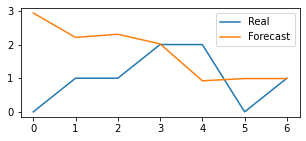

In [38]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror',n_estimators = 14,max_depth = 6,colsample_bytree= 0.7,learning_rate=0.2)
xg.fit(x_train,y_train)
predictions = xg.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [39]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

1.4113774613681185


## N05C

In [40]:
cols = ["N05C","Year","Month","Hour","Weekday Name"]
data = pd.read_csv('pharma/saleshourly.csv',usecols=cols)
enc = LabelEncoder()
data.loc[:,['Weekday Name']] = data.loc[:,['Weekday Name']].apply(enc.fit_transform)
arr_mean = data['N05C'].rolling(5).mean()
data['MA'] = arr_mean
data.fillna(0,inplace=True)
features = data.drop(['N05C'],axis=1)
target = data['N05C']
x_train = features[:-7]
y_train = target[:-7]
x_test = features[-7:]
y_test = target[-7:]
y_test = np.asarray(y_test)

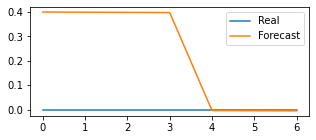

In [41]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
predictions = lr_model.predict(x_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [42]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

0.30194481724792777


In [43]:
dt_model = DecisionTreeRegressor(criterion='mse')
parameters = {
    'max_depth' : max_depth
}
model = GridSearchCV(dt_model, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 8}

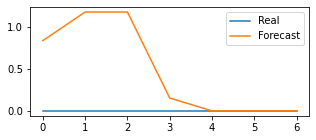

In [44]:
dt_model = DecisionTreeRegressor(criterion='mse',max_depth=8)
dt_model.fit(x_train,y_train)
predictions = dt_model.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [45]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

0.7093917987368094


In [46]:
rf = RandomForestRegressor(random_state = 1)
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth
    
}

model = GridSearchCV(rf, param_grid=parameters, scoring='neg_mean_absolute_error', cv=3)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 6, 'n_estimators': 6}

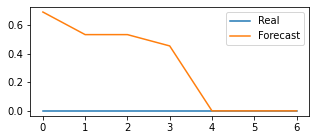

In [47]:
rf = RandomForestRegressor(random_state = 1,max_depth = 6,n_estimators = 6)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [48]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

0.4224531604681686


In [49]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror')
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'colsample_bytree': [0.3,0.5, 0.7],
    'learning_rate' : [0.05, 0.10, 0.15, 0.20]
    
}
model = GridSearchCV(xg, param_grid=parameters,cv=3)
model.fit(x_train,y_train)
model.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.2,
 'max_depth': 5,
 'n_estimators': 15}

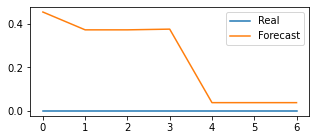

In [50]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror',n_estimators = 15,max_depth = 5,colsample_bytree= 0.7,learning_rate=0.2)
xg.fit(x_train,y_train)
predictions = xg.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [51]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

0.30004589695072637


## R03 

In [52]:
cols = ["R03","Year","Month","Hour","Weekday Name"]
data = pd.read_csv('pharma/saleshourly.csv',usecols=cols)
enc = LabelEncoder()
data.loc[:,['Weekday Name']] = data.loc[:,['Weekday Name']].apply(enc.fit_transform)
arr_mean = data['R03'].rolling(5).mean()
data['MA'] = arr_mean
data.fillna(0,inplace=True)
features = data.drop(['R03'],axis=1)
target = data['R03']
x_train = features[:-7]
y_train = target[:-7]
x_test = features[-7:]
y_test = target[-7:]
y_test = np.asarray(y_test)

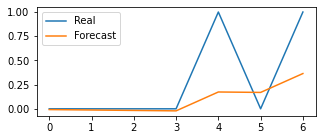

In [53]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
predictions = lr_model.predict(x_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [54]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

0.39934878867156437


In [55]:
dt_model = DecisionTreeRegressor(criterion='mse')
parameters = {
    'max_depth' : max_depth
}
model = GridSearchCV(dt_model, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 7}

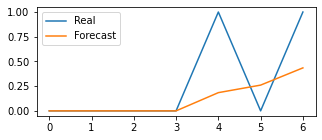

In [56]:
dt_model = DecisionTreeRegressor(criterion='mse',max_depth=7)
dt_model.fit(x_train,y_train)
predictions = dt_model.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [57]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

0.38779546602536624


In [58]:
rf = RandomForestRegressor(random_state = 1)
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth
    
}

model = GridSearchCV(rf, param_grid=parameters, scoring='neg_mean_absolute_error', cv=3)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 7, 'n_estimators': 9}

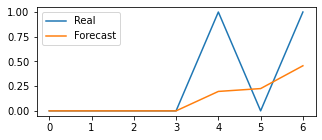

In [59]:
rf = RandomForestRegressor(random_state = 1,max_depth = 7,n_estimators = 9)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [60]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

0.37645489368756063


In [61]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror')
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'colsample_bytree': [0.3,0.5, 0.7],
    'learning_rate' : [0.05, 0.10, 0.15, 0.20]
    
}
model = GridSearchCV(xg, param_grid=parameters,cv=3)
model.fit(x_train,y_train)
model.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.2,
 'max_depth': 6,
 'n_estimators': 15}

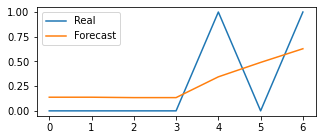

In [62]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror',n_estimators = 15,max_depth = 6,colsample_bytree= 0.7,learning_rate=0.2)
xg.fit(x_train,y_train)
predictions = xg.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [63]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

0.3550329646321655
